In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error




In [46]:
df = pd.read_csv('carprices.csv')
df

,Mileage,Age(yrs),Sell Price($)
0,69000,6,18000
1,35000,3,34000
2,57000,5,26100
3,22500,2,40000
4,46000,4,31500
5,59000,5,26750
6,52000,5,32000
7,72000,6,19300
8,91000,8,12000
9,67000,6,22000


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Mileage        20 non-null     int64
 1   Age(yrs)       20 non-null     int64
 2   Sell Price($)  20 non-null     int64
dtypes: int64(3)
memory usage: 612.0 bytes


In [48]:
df.isnull().sum()

Mileage          0
Age(yrs)         0
Sell Price($)    0
dtype: int64

No null values, hence no preprocessing required

EDA

c:\Users\Shaheryar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Shaheryar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Shaheryar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


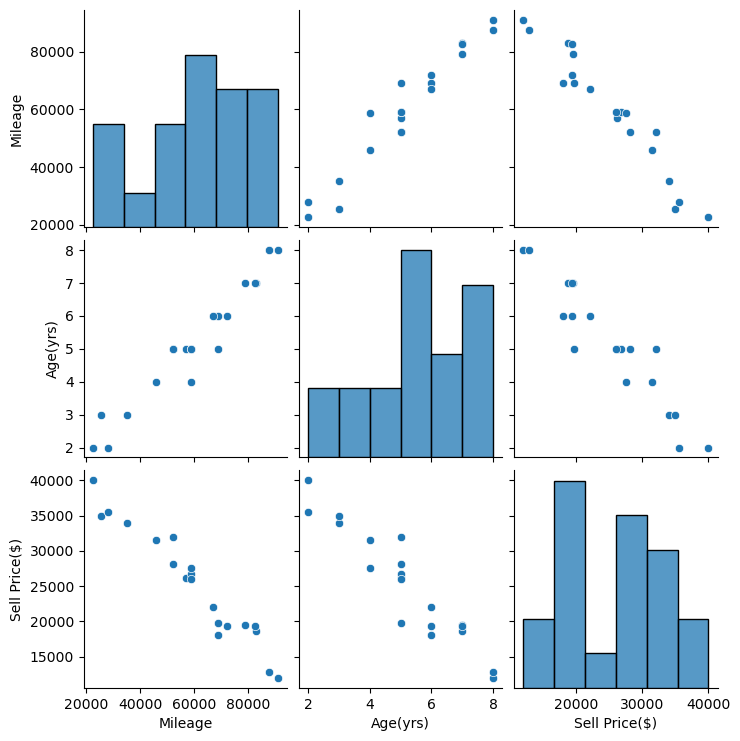

In [49]:
sns.pairplot(df)
plt.show()


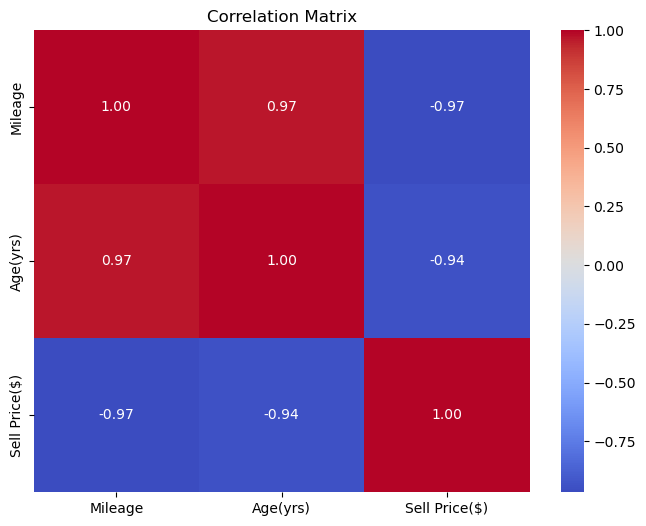

In [50]:

# Correlation matrix to check correlation between different FEATURES
corr = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()



c:\Users\Shaheryar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Shaheryar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Shaheryar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


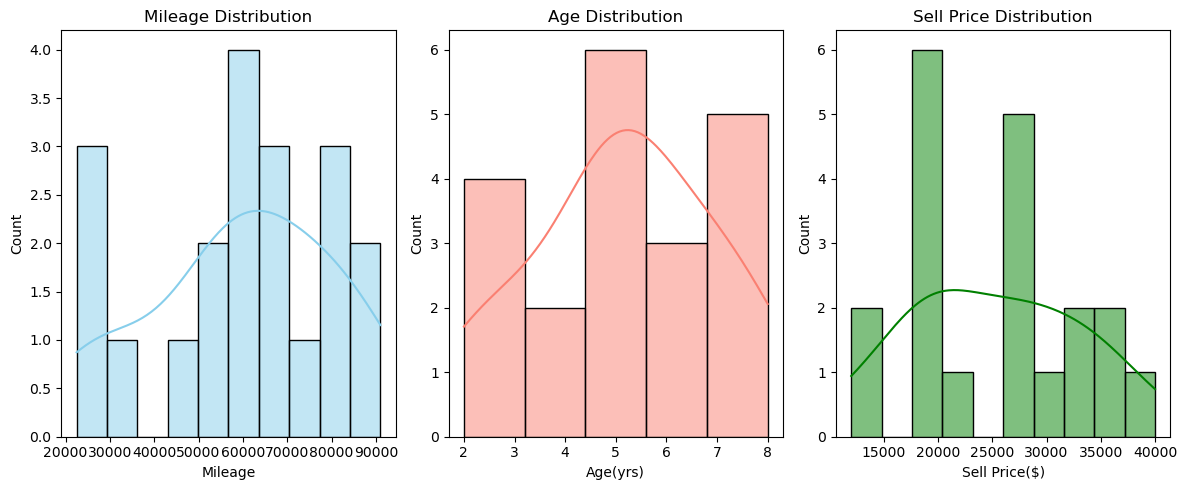

In [51]:

plt.figure(figsize=(12, 5))

# Distributions of different features

# Distribution of Mileage feature
plt.subplot(1, 3, 1)
sns.histplot(df['Mileage'], bins=10, kde=True, color='skyblue')
plt.title('Mileage Distribution')

# Distribution of Age feature
plt.subplot(1, 3, 2)
sns.histplot(df['Age(yrs)'], bins=5, kde=True, color='salmon')
plt.title('Age Distribution')

# Distribution of Sell Price feature 
plt.subplot(1, 3, 3)
sns.histplot(df['Sell Price($)'], bins=10, kde=True, color='green')
plt.title('Sell Price Distribution')


# show the plot
plt.tight_layout()
plt.show()

In [52]:
# Separate features (X) and target variable (y)
X = df[['Mileage', 'Age(yrs)']]
y = df['Sell Price($)']



In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


lr = make_pipeline(PolynomialFeatures(degree=2), RandomForestRegressor(n_estimators=100, random_state=42))

lr.fit(X_train, y_train)

# Predictions 
y_pred = lr.predict(X_test)
y_pred


array([22161.        , 24310.        , 36140.3       , 35630.3       ,
       14568.        , 26538.66666667])

In [54]:

# r2 score - regression score
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)


R-squared Score: 0.8847826835676075


In [55]:
#Mean Absolute Error - MAE

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)



Mean Absolute Error (MAE): 2386.8222222222234


In [56]:
# Mean Squared Error - MSE
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)


Mean Squared Error (MSE): 8193911.492962965


In [57]:

# Root Mean Squared Error - RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 2862.500915801245
